# 1D heat equation, finite difference, SciPy integration

_Gilbert François Duivesteijn_

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import odeint
from scipy.linalg import toeplitz
from IPython import display

When only the vector $\vec{u} = [u_1, u_2, ... , u_{n-1}]$ is in the system of equations (excluding boundary nodes), we can write the Dirichlet boundary conditions in $b$ as a constant in the function:

\begin{align}
\frac{\partial u}{\partial t} &= \kappa \frac{\partial^2 u}{\partial x^2}
\end{align}

Let's discretize the spacial part and write it as a linear system of equations:

\begin{align}
\frac{\partial u}{\partial t} &= A\cdot u + b \\
\frac{\partial u}{\partial t} &= 
\frac{\kappa}{\Delta x^2} \begin{bmatrix}
-2 &  1 &  0 & \cdots &  0 \\
 1 & -2 &  1 & \cdots &  0 \\
 \vdots &    &  \ddots &  & \vdots \\
 0 &      \cdots & 1 & -2 & 1 \\
 0 &     \cdots & 0 & 1 & -2 \\
\end{bmatrix} 
\begin{bmatrix}
u_1 \\
u_2 \\
\vdots \\
u_{n-2} \\
u_{n-1}
\end{bmatrix} +
\frac{\kappa}{\Delta x^2}
\begin{bmatrix}
u_0 \\
0 \\
\vdots \\
0 \\
u_{n}
\end{bmatrix}
\end{align}


Now we can solve this system of equations as a normal ODE.

In [3]:
# Constant kappa
k = 1

# Spacial domain
n = 100
L = 1
dx = L / n
x = np.linspace(0, L, n)

# Time steps
T0 = 0
Tn = 0.1
t_steps = 100
t = np.linspace(T0, Tn, t_steps)

# Boundary conditions
U0 = 1
Un = -1

# Initial condition, u(x,0)=0
Uinit = np.zeros(shape=(n,))

# Discretization matrix A
A = toeplitz([-2.0, 1.0] + [0.0]*(n-2))

# Vector with boundary conditions b
b = np.zeros(shape=(n))
b[0] = U0
b[n-1] = Un

In [4]:
print("\nA =")
print(A)
print("\nb =")
print(b)


A =
[[-2.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]

b =
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.]


In [5]:
def fn(u, t, A, b, k, dx):
    return ((k/dx**2)*np.matmul(A, u) + (k/dx**2)*b)

In [6]:
u = odeint(fn, Uinit, t, args=(A, b, k, dx))

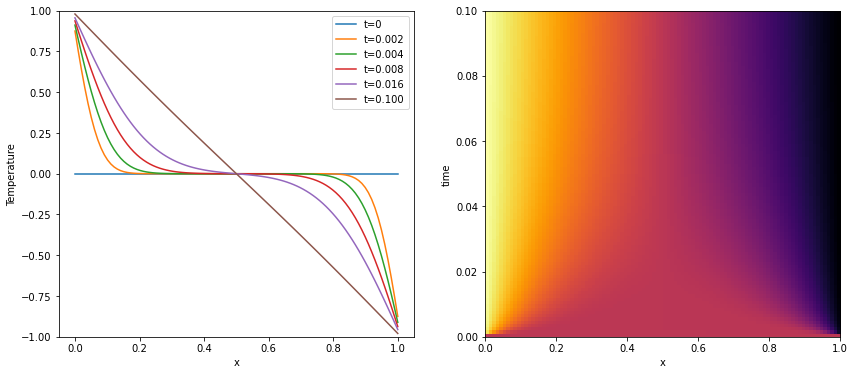

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].set_ylim(min(U0, Un),max(U0,Un))
axs[0].plot(x, u[0], label="t=0")
axs[0].plot(x, u[2], label="t=0.002")
axs[0].plot(x, u[4], label="t=0.004")
axs[0].plot(x, u[8], label="t=0.008")
axs[0].plot(x, u[16], label="t=0.016")
axs[0].plot(x, u[99], label="t=0.100")
axs[0].legend()
axs[0].set_ylabel("Temperature")
axs[0].set_xlabel("x")
axs[1].imshow(u, aspect="auto", cmap="inferno", origin="lower", extent=[0, L, T0, Tn])
axs[1].set_xlabel(f"x")
axs[1].set_ylabel("time")
plt.show()

In [8]:
# Animation of the solution over the integrated time span. 

def animate(frame):
    """ Animation """
    y = u[frame]
    line.set_data((x, y))
    plt.title(f"t={Tn * frame / t_steps:0.2f}")

# Create the plot
fig = plt.figure(figsize=(6, 6))
lines = plt.plot([])
line = lines[0]
plt.xlim([0, L])
plt.ylim([-1, 1])
plt.ylabel("Temperature")
plt.xlabel("x")
plt.title("")
  
anim = FuncAnimation(fig, animate, frames=t_steps, interval=50)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()